# Employee Exit Survey Analysis

## Summary

I analyzed exit survy data from Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

The cleaned dataset had 651 rows attributed to either TAFE, or DETE.

* 585 rows specified one or more reasons for the resignation.
  * 486 (83%) cited reasons other than (but not excluding) job dissatisfaction.
  * 240 (~40%) cited job dissatisfaction as one of the factors for their resignation
    * Of those, 141 (~60%) also cited additional reasons for the resignation.
    * 99 (~40%) cited only job dissatisfaction as reason for their resignation.
* Resignation dates range from 2006 to 2014.

__I found that:__

* Resignations increased by more than a factor of 100 starting in 2010.
  * From 2004 to 2009 only three resignations are recorded.
  * 632 resignations were recorded from 2010 onward.

* Employees with 3 years of service or fewer were least likely to resign due to some kind of job dissatisfaction, vs other reasons.
* Employees with 7-11 years of service are most likely to resign due to some kind of job dissatisfaction vs other reasons.

* Across all age ranges, 38% of resignations involve some sort of job dissatisfaction.
  * The youngest employees (<=25yo)'s resignations are least likely to involve job dissatisfaction.
  * 42% of 26-30 year old employees resignations are likely to involve job dissatisfaction.
  * Employees between 31 and 50 years of age are below or near average in resigning for reasons involving job dissatisfaction.
  * Employees older than 51 years are more likely than average to resign for reasons involving job dissatisfaction.

* Employees at DETE resign for reasons involving job dissatisfaction 48% of the time, while the figure for TAFE is 27%.

## Introduction

This notebook details the analysis of employee exit surveys from DETE and TAFE.

Data preparation and cleaning for this analysis was performed using [Resignation Data Cleaning and Preparation.ipynb](file:///Resignation%20Data%20Cleaning%20and%20Preparation.ipynb).

In this project I'll try to answer the following questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

My analysis draws on exit surveys from Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

I don't have a complete data dictionary, so I'll have to rely on some general knowledge in interpreting the data.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

## Analysis

### Import libraries and configure notebook options

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina' # Doubles chart resolution

### Read in previously prepared data

In [2]:
combined_updated = pd.read_pickle('combined_updated.pickle')
len(combined_updated)

651

### Size of dataset

In [3]:
(combined_updated['dissatisfied'] | combined_updated['other_reasons']).sum()

585

In [4]:
combined_updated['dissatisfied'].sum()

240

In [5]:
combined_updated['other_reasons'].sum()

486

In [6]:
(combined_updated['dissatisfied'] & combined_updated['other_reasons']).sum()

141

In [7]:
(combined_updated['dissatisfied'] & ~combined_updated['other_reasons']).sum()

99

The dataset has:

* 585 rows which included at least one reason for the employees resignation.
* 240 involved job dissatisfaction.
* 486 involve other reasons.
* 141 involved another reason, in addition to job dissatisfaction
* 99 involve only job dissatisfaction.

### Distribution of Resignation Dates

In [8]:
combined_updated['cease_date'].value_counts().sort_index()

2006.0      1
2009.0      2
2010.0     70
2011.0    116
2012.0    223
2013.0    201
2014.0     22
Name: cease_date, dtype: int64

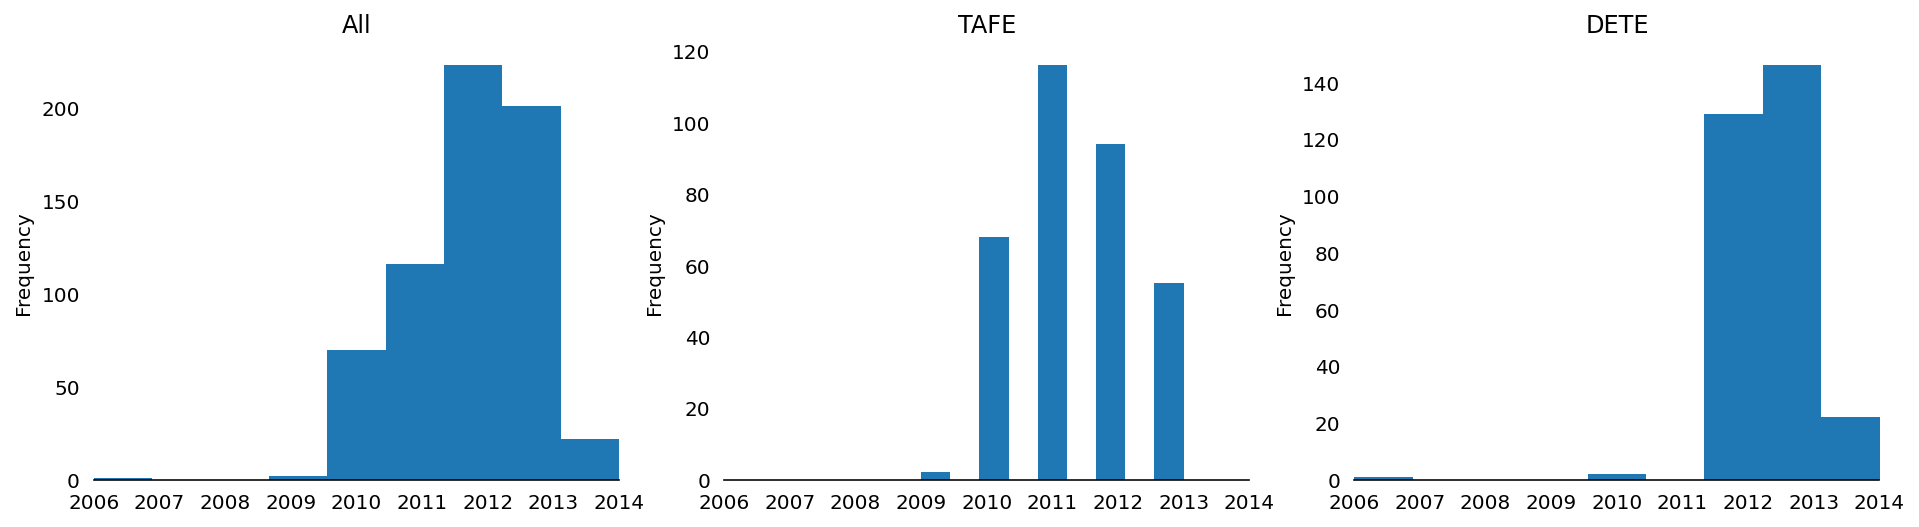

In [9]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize =(16,4))

combined_updated['cease_date'].plot.hist(ax=ax1, bins=9, xlim=(2006,2014))
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(left=False, bottom=False)
ax1.set_title("All")

combined_updated[combined_updated['institute'] == 'TAFE']['cease_date'].plot.hist(ax=ax2, bins=9, xlim=(2006,2014))
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(left=False, bottom=False)
ax2.set_title("TAFE")

combined_updated[combined_updated['institute'] == 'DETE']['cease_date'].plot.hist(ax=ax3, bins=9, xlim=(2006,2014))
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.tick_params(left=False, bottom=False)
ax3.set_title("DETE")

plt.show()

This seems significant, but their meaning is unclear.

They suggest that either:
* The resignations in recent years increased dramatically, by more than a factor of ten.

OR
* The dataset doesnt' include all resignations for the years they cover and is not a random sample of the population of resignations.

If its the latter, then much of the remaining analysis and any conclusions are likely to be flawed.

### Duration of Service

In [10]:
combined_updated['service_cat'].notnull().sum()

563

563 rows had enough information to determine the duration of the employees service in their last position before their resignation. 

I categorized this information as follows:
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

These categories were used for further aggregation and analysis.

In [11]:
rows_in_order = ['New', 'Experienced', 'Established', 'Veteran', 'All']
service_table = combined_updated.pivot_table('dissatisfied', index='service_cat', aggfunc=['mean', 'sum'], margins=True)
service_table.columns = ["percent dissatisfied", "number dissatisfied"]
service_table['percent dissatisfied'] = service_table['percent dissatisfied'].round(3)*100
service_table = service_table.reindex(rows_in_order)
service_table

,percent dissatisfied,number dissatisfied
service_cat,,
New,29.5,57
Experienced,34.3,59
Established,51.6,32
Veteran,48.5,66
All,38.0,214


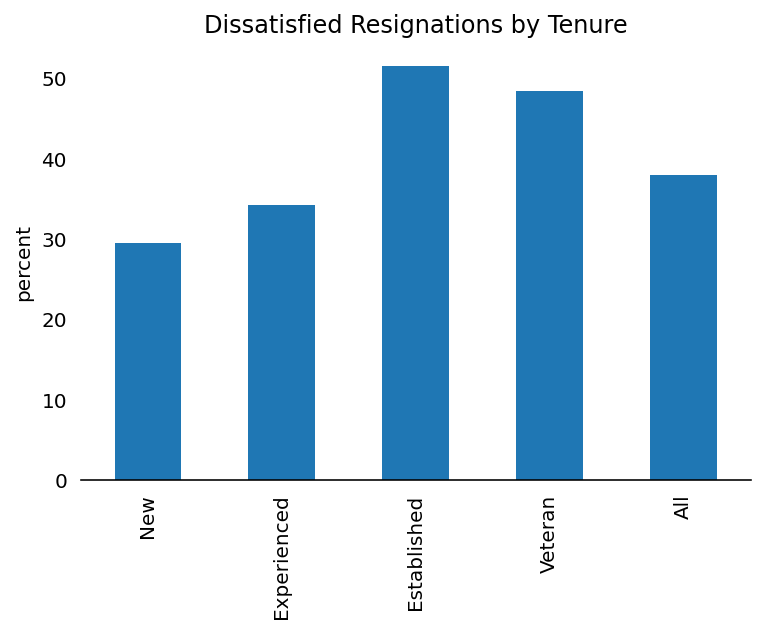

In [12]:
ax = (service_table['percent dissatisfied']).plot.bar(legend=False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.set_xlabel("")
ax.set_ylabel("percent")
ax.set_title("Dissatisfied Resignations by Tenure")
plt.show()

Across all service durations, 38% of resignations involve job dissatisfaction. Employees with six years or fewer of service are less likely than average to cite job dissatisfaction as a reason for their resignation, newest employees being the least likely. Employees with seven years or more of service are more likely than average to depart for reasons that include job dissatisfaction.

If we look at the total number of people, rather than category percentages, we see that more than half those whose reasons for resignation include job dissatisfaction, are either New or Experienced.

### Dissatisfaction by age range

In [13]:
age_table = combined_updated.pivot_table('dissatisfied', index='age', aggfunc=['mean', 'sum'], margins=True)
age_table.columns = ["percent dissatisfied", "number dissatisfied"]
age_table['percent dissatisfied'] = age_table['percent dissatisfied'].round(3)*100
age_table

,percent dissatisfied,number dissatisfied
age,,
20 or younger,20.0,2
21-25,30.6,19
26-30,41.8,28
31-35,37.7,23
36-40,34.2,25
41-45,37.6,35
46-50,38.3,31
51-55,42.3,30
56 or older,42.3,33


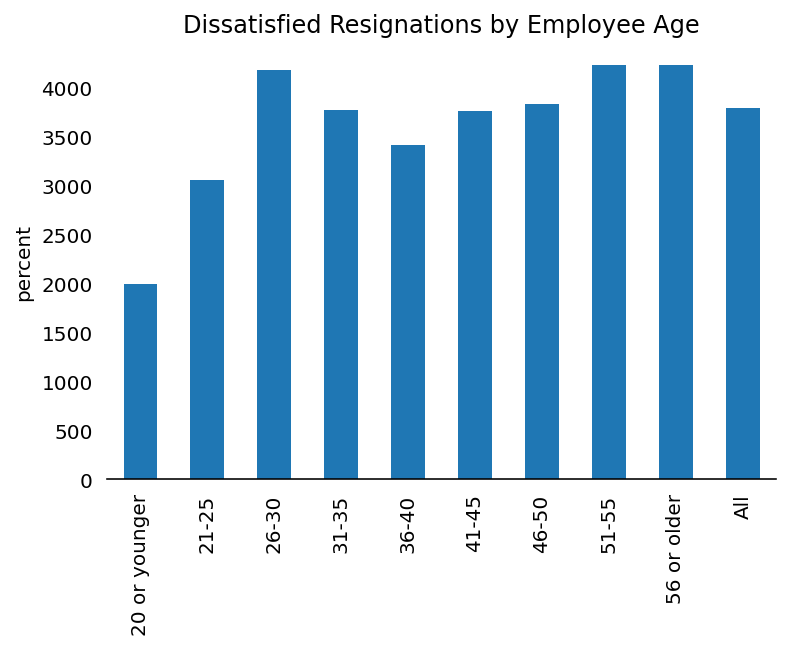

In [14]:
ax = (age_table['percent dissatisfied']*100).plot.bar(legend=False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.set_xlabel("")
ax.set_ylabel("percent")
ax.set_title("Dissatisfied Resignations by Employee Age")
plt.show()

* Across all age ranges, 38% of resignations involve some sort of job dissatisfaction.
* The youngest employees (<=25yo)'s resignations are least likely to involve job dissatisfaction.
* 42% of 26-30 year old employees resignations are likely to involve job dissatisfaction.
* Employees between 31 and 50 years of age are below or near average in resigning for reasons involving job dissatisfaction.
* Employees older than 51 years are more likely than average to resign for reasons involving job dissatisfaction.

### Dissatisfaction by Institute

In [15]:
institute_table = combined_updated.pivot_table('dissatisfied', index='institute', aggfunc=['mean', 'sum'], margins=True)
institute_table.columns = ["percent dissatisfied", "number dissatisfied"]
institute_table['percent dissatisfied'] = institute_table['percent dissatisfied'].round(3)*100
institute_table

,percent dissatisfied,number dissatisfied
institute,,
DETE,47.9,149
TAFE,26.8,91
All,36.9,240


Nearly one half of resignations from DETE involved job dissatisfaction, while only just over a quarter of resignations from TAFE did.

## Conclusion

Resignations at DETE and TAFE exploded 100-fold after 2009 suggesting significant changes at both institutions. Unfortunately the dataset includes just three resignations from before 2010, making a detailed comparison of the two  periods impossible.

Job dissatisfaction is a factor in almost 40% of resignations. It is the exclusive factor in 17% of resignations. 

While the % of resignations involving job dissatisfaction varies by age and tenure of the departing employee, it is a significant factor in resignations in every group. At least 30% of resigning employees cite job dissatisfaction as a reason for every duration of tenure, and also for every age group save those twenty years old or younger.

The significance of job dissatisfaction in resignations varies substantially between DETE and TAFE. Efforts to reduce job dissatisfaction, and resulting resignations, should seek to understand the reasons for the difference between institutions.